In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
def get_len(tx):
    return len(tx.split(' '))

def get_sentences(tx):
    ls = tx.split('.')
    ctr = 0
    for j in ls:
        if j!='':
            ctr+=1
    return ctr
        

In [4]:
df.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

### Basic EDA 

(array([  1.,  75., 253., 326., 346., 384., 459., 414., 408., 168.]),
 array([125., 133., 141., 149., 157., 165., 173., 181., 189., 197., 205.]),
 <BarContainer object of 10 artists>)

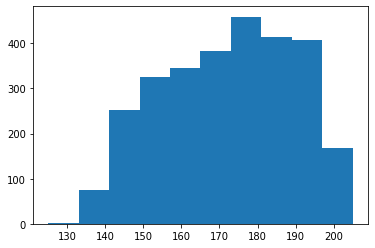

In [5]:
plt.hist(df.apply(lambda x: get_len(x['excerpt']), axis=1))

(array([ 363., 1123.,  764.,  315.,  142.,   83.,   29.,    8.,    5.,
           2.]),
 array([ 2. ,  5.2,  8.4, 11.6, 14.8, 18. , 21.2, 24.4, 27.6, 30.8, 34. ]),
 <BarContainer object of 10 artists>)

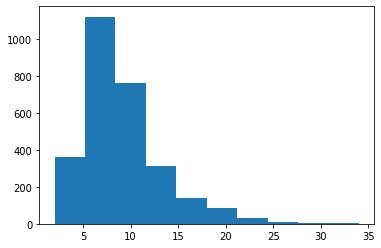

In [6]:
df['sen_len'] = df.apply(lambda x: get_sentences(x['excerpt']), axis=1)
plt.hist(df.apply(lambda x: get_sentences(x['excerpt']), axis=1))

(array([ 55., 120., 280., 402., 490., 563., 458., 312., 123.,  31.]),
 array([-3.67626777, -3.13750201, -2.59873625, -2.05997049, -1.52120473,
        -0.98243897, -0.44367321,  0.09509255,  0.63385831,  1.17262407,
         1.71138983]),
 <BarContainer object of 10 artists>)

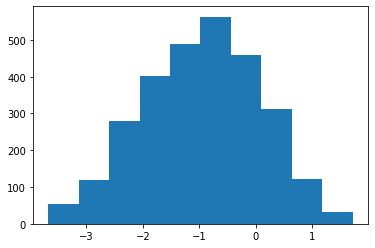

In [7]:
plt.hist(df['target'])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.220e+02, 2.161e+03, 3.900e+02, 6.000e+01]),
 array([0.        , 0.06496713, 0.12993426, 0.19490139, 0.25986852,
        0.32483565, 0.38980278, 0.45476991, 0.51973704, 0.58470417,
        0.6496713 ]),
 <BarContainer object of 10 artists>)

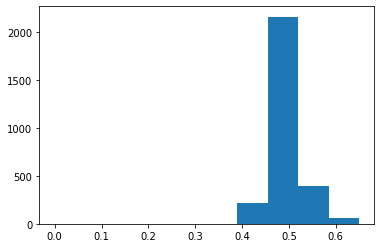

In [10]:
plt.hist(df['standard_error'])

### CHECKING WIKIPEDIA PAGES TARGET DISTRIBUTION 

In [153]:
df['wikipedia_true'] = df.apply(lambda x:  x['url_legal'].find('wikipedia')>0 if pd.isna(x['url_legal'])!=True else False, axis=1)

In [154]:
sum(df['wikipedia_true'])

372

(array([ 8., 12., 48., 58., 75., 60., 63., 32., 10.,  6.]),
 array([-3.5491902 , -3.06737247, -2.58555473, -2.103737  , -1.62191926,
        -1.14010153, -0.65828379, -0.17646606,  0.30535168,  0.78716941,
         1.26898715]),
 <BarContainer object of 10 artists>)

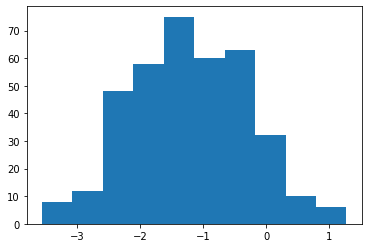

In [155]:
plt.hist(df[df['wikipedia_true']]['target'])

### EXTRACTING ALL PARAGRAPHS FROM WIKIPEDIA

In [181]:
import urllib
from bs4 import BeautifulSoup
import re
import tqdm

In [188]:
full_data = {}
num_rows = df[df['wikipedia_true']].shape[0]

for ind, row in tqdm.tqdm(df[df['wikipedia_true']].iterrows(), total=num_rows):
    elem={}
    try:
        url = row['url_legal']
        req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        page = urllib.request.urlopen(req).read()
    
    except:
        url = row['url_legal']
        url = urllib.parse.urlsplit(url)
        url = list(url)
        url = [urllib.parse.quote(x) for x in url]
        url = urllib.parse.urlunsplit(url)
        req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        page = urllib.request.urlopen(req).read()
    
    soup = BeautifulSoup(page, 'html.parser')
    para_ls = soup.find_all('p')
    
    full_text=''
    html_source = []
    
    for para in para_ls:
        text = para.get_text()
        full_text += re.sub(r'\[.*?\]+', '', text)
        html_source.append(str(para))
    
    elem['full_text'] = full_text
    elem['html_source'] = html_source
    full_data[row['id']] = elem
    
    

100%|██████████| 372/372 [02:11<00:00,  2.83it/s]


### DATA DUMP

In [191]:
import pickle

with open('scraped_data/wiki_data.pkl', 'wb') as file:
    pickle.dump(full_data, file)

### EXAMPLE OUT 

In [193]:
full_data.keys()

dict_keys(['07de53e3c', 'a26e55bea', '5127fb10f', '0d3a8f33b', '7073d1ef3', 'e83e2cc69', 'e4d810c98', '688e3c808', '6ee4f1df3', 'bba96ae90', '6849b506d', '9ebae047b', '2b2fdfc8c', '95e0a7b8d', '14365d003', '92a8d63d2', 'b12cb6e0d', '49cae2321', 'bc748d8e3', '1e497b6bc', '201eff52d', '8c3532d5e', 'a512494fc', '62526c010', 'd74e2a8a3', '797c77844', '069d0da0f', '674bd8368', 'fed2fbd39', 'c524ddc05', '92749fef5', '09fe55c1c', '1eb28e98e', 'ac50d303b', '50c339373', 'fd23df088', '137af2682', '954b463dc', 'c228478ac', 'e83d8c94b', 'ea67143e5', '68030b769', 'cf3f0844b', 'f8c8e64bb', '8f11d4954', '9fefb4259', '6e39df98c', 'cb472863a', '875601dcb', '24e16582a', '0ee9ed7d1', 'e88783670', '5e1c3fc3c', '4afe4aad8', '7f8863c77', '0263a173f', '32fc19585', '9191df3d4', 'f43a27b6d', '701310673', 'f1a527e3b', 'dca4328c4', 'b9340b6e4', 'b972ec989', '25427adb0', '51c8c5c23', 'f8c88833f', 'a15ef0c1c', '00589d631', '522b40c9f', '1b763f5eb', '0cd2488aa', '99361e803', '0b252057e', '62e7568a4', 'b5ffa97d5', '

In [195]:
full_data['fd23df088']['full_text']

'Civil law is a legal system originating in mainland Europe and adopted in much of the world. The civil law system is intellectualized within the framework of Roman law, and with core principles codified into a referable system, which serves as the primary source of law. The civil law system is often contrasted with the common law system, which originated in medieval England, whose intellectual framework historically came from uncodified judge-made case law, and gives precedential authority to prior court decisions.\nHistorically, a civil law is the group of legal ideas and systems ultimately derived from the Corpus Juris Civilis, but heavily overlaid by Napoleonic, Germanic, canonical, feudal, and local practices, as well as doctrinal strains such as natural law, codification, and legal positivism.\nConceptually, civil law proceeds from abstractions, formulates general principles, and distinguishes substantive rules from procedural rules. It holds case law secondary and subordinate to

In [198]:
df[df['id']=='fd23df088']['excerpt'].values

array(['Civil law, civilian law, or Roman law is a legal system originating in Europe, intellectualized within the framework of late Roman law, and whose most prevalent feature is that its core principles are codified into a referable system which serves as the primary source of law. This can be contrasted with common law systems whose intellectual framework comes from judge-made decisional law which gives precedential authority to prior court decisions on the principle that it is unfair to treat similar facts differently on different occasions (doctrine of judicial precedent, or stare decisis).\nHistorically, a civil law is the group of legal ideas and systems ultimately derived from the Code of Justinian, but heavily overlaid by Napoleonic, Germanic, canonical, feudal, and local practices, as well as doctrinal strains such as natural law, codification, and legal positivism.\nConceptually, civil law proceeds from abstractions, formulates general principles, and distinguishes substanti